In [2]:
import pandas as pd

In [3]:
ecommerce=pd.read_csv('ecommerce_orders_dataset (1).csv')

In [4]:
ecommerce

,order_id,product_id,product_name,category,price,quantity,total_price,order_date,customer_id,customer_city,customer_gender,payment_method,delivery_status,delivery_date,cancellation_reason
0,O00001,P242,Football,Sports,17.38,3,52.14,2023-09-08,C2679,Ibadan,Male,Cash on Delivery,Delivered,2023-09-13,NaN
1,O00002,P617,Novel,Books,19.75,2,39.50,2023-08-27,C1434,Ibadan,Male,Cash on Delivery,Pending,NaN,NaN
2,O00003,P877,Biography,Books,227.36,3,682.08,2025-04-08,C3615,Port Harcourt,Female,PayPal,Cancelled,NaN,NaN
3,O00004,P489,Jeans,Clothing,478.82,3,1436.46,2023-04-15,C2584,Kano,Female,Cash on Delivery,Delivered,2023-04-18,NaN
4,O00005,P180,Blender,Home & Kitchen,366.22,5,1831.10,2023-05-08,C5803,Ibadan,Female,Cash on Delivery,Delivered,2023-05-16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O00996,P694,Textbook,Books,268.57,2,537.14,2024-01-29,C7911,Ibadan,Male,Credit Card,Delivered,2024-02-01,NaN
996,O00997,P671,Sneakers,Clothing,6.42,1,6.42,2024-01-07,C8764,Abuja,Male,Credit Card,Returned,NaN,NaN
997,O00998,P247,Cookware Set,Home & Kitchen,425.13,2,850.26,2023-10-29,C7898,Abuja,Male,Debit Card,Delivered,2023-11-07,NaN
998,O00999,P850,Laptop,Electronics,63.03,2,126.06,2024-01-22,C1431,Port Harcourt,Female,Credit Card,Pending,NaN,NaN


In [5]:
#1 Which product generates the most revenue overall?

ecommerce.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(1)

product_name
Dumbbells    59009.15
Name: total_price, dtype: float64

In [6]:
##2 Which city has the highest number of delivered orders?
ecommerce[ecommerce['delivery_status']=='Delivered'].groupby('customer_city').size().sort_values(ascending=False).head(1)

customer_city
Kano    159
dtype: int64

In [7]:
#3 what is the average revenue per customer?


ecommerce.groupby('customer_id')['total_price'].mean().sort_values(ascending=False)

customer_id
C4394    2472.35
C7382    2459.45
C9749    2424.75
C8126    2424.60
C7703    2410.50
          ...   
C9552      18.27
C2347      13.04
C8798       8.58
C2589       6.89
C8764       6.42
Name: total_price, Length: 948, dtype: float64

In [8]:
ecommerce.dtypes

order_id                object
product_id              object
product_name            object
category                object
price                  float64
quantity                 int64
total_price            float64
order_date              object
customer_id             object
customer_city           object
customer_gender         object
payment_method          object
delivery_status         object
delivery_date           object
cancellation_reason     object
dtype: object

In [92]:
#4 Are there seasonal patterns in order volume (e.g., spikes during certain months)?


ecommerce["order_date"]=ecommerce["order_date"].astype("datetime64[ns]")
ecommerce["order_month"]=ecommerce["order_month"].astype("datetime64[ns]")

TypeError: <class 'method'> is not convertible to datetime, at position 0

In [94]:
ecommerce['order_month'] = ecommerce['order_date'].dt.month_name

In [96]:
monthly_orders = ecommerce.groupby('order_month').size()

In [98]:
monthly_orders

order_month
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x13f5a5fd0>>    1000
dtype: int64

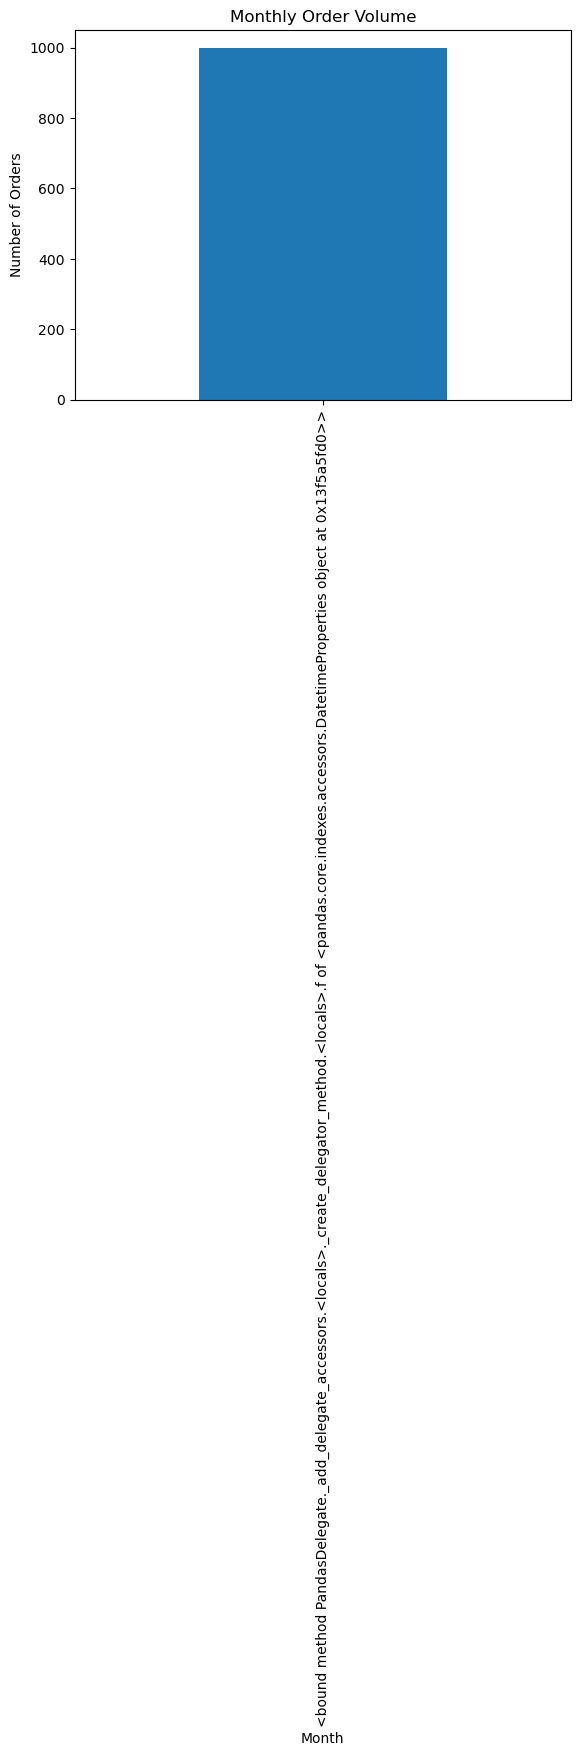

In [100]:
import matplotlib.pyplot as plt

monthly_orders.plot(kind='bar')
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

In [13]:
#5 Which product categories are most frequently returned?


ecommerce[ecommerce['delivery_status']=='Returned'].groupby('category').size().sort_values(ascending=False).head(5)

category
Clothing          24
Home & Kitchen    19
Sports            18
Electronics       17
Beauty            16
dtype: int64

In [15]:
##Customer Behavior
##1 Do male or female customers place more high-value orders (e.g., > ₦100,000)?
ecommerce['high_value']=ecommerce['total_price']>100000

In [16]:
ecommerce['high_value']

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: high_value, Length: 1000, dtype: bool

In [63]:
ecommerce.groupby('customer_gender')['high_value'].size()

customer_gender
Female    529
Male      471
Name: high_value, dtype: int64

In [67]:
##2 How many unique customers placed repeat orders?
ecommerce['customer_id'].value_counts().gt(1).sum()

49

In [19]:
ecommerce

,order_id,product_id,product_name,category,price,quantity,total_price,order_date,customer_id,customer_city,customer_gender,payment_method,delivery_status,delivery_date,cancellation_reason,order_month,high_value
0,O00001,P242,Football,Sports,17.38,3,52.14,2023-09-08,C2679,Ibadan,Male,Cash on Delivery,Delivered,2023-09-13,NaN,9,False
1,O00002,P617,Novel,Books,19.75,2,39.50,2023-08-27,C1434,Ibadan,Male,Cash on Delivery,Pending,NaN,NaN,8,False
2,O00003,P877,Biography,Books,227.36,3,682.08,2025-04-08,C3615,Port Harcourt,Female,PayPal,Cancelled,NaN,NaN,4,False
3,O00004,P489,Jeans,Clothing,478.82,3,1436.46,2023-04-15,C2584,Kano,Female,Cash on Delivery,Delivered,2023-04-18,NaN,4,False
4,O00005,P180,Blender,Home & Kitchen,366.22,5,1831.10,2023-05-08,C5803,Ibadan,Female,Cash on Delivery,Delivered,2023-05-16,NaN,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O00996,P694,Textbook,Books,268.57,2,537.14,2024-01-29,C7911,Ibadan,Male,Credit Card,Delivered,2024-02-01,NaN,1,False
996,O00997,P671,Sneakers,Clothing,6.42,1,6.42,2024-01-07,C8764,Abuja,Male,Credit Card,Returned,NaN,NaN,1,False
997,O00998,P247,Cookware Set,Home & Kitchen,425.13,2,850.26,2023-10-29,C7898,Abuja,Male,Debit Card,Delivered,2023-11-07,NaN,10,False
998,O00999,P850,Laptop,Electronics,63.03,2,126.06,2024-01-22,C1431,Port Harcourt,Female,Credit Card,Pending,NaN,NaN,1,False


In [71]:
##3 Which city has the most loyal customers (based on order frequency)?
ecommerce.groupby('customer_city')['customer_id'].count().sort_values(ascending=False)

customer_city
Kano             219
Ibadan           202
Abuja            197
Port Harcourt    193
Lagos            189
Name: customer_id, dtype: int64

In [73]:
######Order & Fulfillment Patterns
##What is the average delivery time by city?
ecommerce["delivery_date"]=ecommerce["delivery_date"].astype("datetime64[ns]")


In [76]:
ecommerce['delivery_time']=(ecommerce['delivery_date']-ecommerce['order_date']).dt.days

In [84]:
avg_delivery=ecommerce.groupby('customer_city')['delivery_time'].mean().sort_values(ascending=False)
avg_delivery

customer_city
Port Harcourt    6.090278
Lagos            5.962121
Ibadan           5.920863
Abuja            5.637681
Kano             5.591195
Name: delivery_time, dtype: float64

In [22]:
##2 Is there a link between payment method and delivery status?
pd.crosstab(ecommerce['payment_method'], ecommerce['delivery_status'])

delivery_status,Cancelled,Delivered,Pending,Returned
payment_method,,,,
Bank Transfer,33,149,10,22
Cash on Delivery,29,135,8,15
Credit Card,20,142,7,24
Debit Card,25,147,7,29
PayPal,28,139,14,17


In [23]:
##3 Are orders placed on weekends more likely to be cancelled or delayed?

ecommerce['order_day'] = pd.to_datetime(ecommerce['order_date']).dt.day_name()

In [24]:
ecommerce

,order_id,product_id,product_name,category,price,quantity,total_price,order_date,customer_id,customer_city,customer_gender,payment_method,delivery_status,delivery_date,cancellation_reason,order_month,high_value,order_day
0,O00001,P242,Football,Sports,17.38,3,52.14,2023-09-08,C2679,Ibadan,Male,Cash on Delivery,Delivered,2023-09-13,NaN,9,False,Friday
1,O00002,P617,Novel,Books,19.75,2,39.50,2023-08-27,C1434,Ibadan,Male,Cash on Delivery,Pending,NaN,NaN,8,False,Sunday
2,O00003,P877,Biography,Books,227.36,3,682.08,2025-04-08,C3615,Port Harcourt,Female,PayPal,Cancelled,NaN,NaN,4,False,Tuesday
3,O00004,P489,Jeans,Clothing,478.82,3,1436.46,2023-04-15,C2584,Kano,Female,Cash on Delivery,Delivered,2023-04-18,NaN,4,False,Saturday
4,O00005,P180,Blender,Home & Kitchen,366.22,5,1831.10,2023-05-08,C5803,Ibadan,Female,Cash on Delivery,Delivered,2023-05-16,NaN,5,False,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O00996,P694,Textbook,Books,268.57,2,537.14,2024-01-29,C7911,Ibadan,Male,Credit Card,Delivered,2024-02-01,NaN,1,False,Monday
996,O00997,P671,Sneakers,Clothing,6.42,1,6.42,2024-01-07,C8764,Abuja,Male,Credit Card,Returned,NaN,NaN,1,False,Sunday
997,O00998,P247,Cookware Set,Home & Kitchen,425.13,2,850.26,2023-10-29,C7898,Abuja,Male,Debit Card,Delivered,2023-11-07,NaN,10,False,Sunday
998,O00999,P850,Laptop,Electronics,63.03,2,126.06,2024-01-22,C1431,Port Harcourt,Female,Credit Card,Pending,NaN,NaN,1,False,Monday


In [25]:
weekend_orders = ecommerce[ecommerce['order_day'].isin(['Saturday', 'Sunday'])]

In [26]:
weekend_orders['delivery_status'].value_counts()

delivery_status
Delivered    209
Cancelled     46
Returned      39
Pending       16
Name: count, dtype: int64

In [27]:
ecommerce['delivery_status'].value_counts()

delivery_status
Delivered    712
Cancelled    135
Returned     107
Pending       46
Name: count, dtype: int64

In [28]:
##4 How does quantity ordered relate to delivery status?
ecommerce.groupby('delivery_status')['quantity'].mean().sort_values(ascending=False)

delivery_status
Returned     3.467290
Delivered    3.018258
Cancelled    2.940741
Pending      2.891304
Name: quantity, dtype: float64

In [29]:
##Product-Level Analysis
##1 Which product has the highest cancellation rate?
ecommerce[ecommerce['delivery_status']=='Cancelled'].groupby("product_name").size().sort_values(ascending=False).head(5)

product_name
Novel         11
Dumbbells     10
Biography      8
Smartphone     8
Sneakers       7
dtype: int64

In [30]:
##2 What is the most popular product in each category?
ecommerce['category'].value_counts().sort_values(ascending=False).head(5)

category
Clothing       180
Sports         173
Books          166
Electronics    163
Beauty         160
Name: count, dtype: int64

In [31]:
##3 Which products have the highest average order value (price × quantity)?
ecommerce.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(3)

product_name
Dumbbells    59009.15
Jeans        47453.39
Microwave    42829.73
Name: total_price, dtype: float64